Group 12

Anakha Krishnavilasom Gopalakrishnan -  14 hours

Daniel Juster - 14 hours

# **1**

The dataset associated with this assignment was downloaded from www.hemnet.se
on 2020-10-18. The data contains information about selling prices of villas in
Landvetter that were sold in the previous 12 months.

**Task a** 

Find a linear regression model that relates the living area to the selling price. If
you did any data cleaning step(s), describe what you did and explain why.


In [200]:
# Importing librarties

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Visual inspection of data
We only have 56 rows (sales) of data, so it is possible to browse through the complete set. What can be noted is that 2 sales does not have any rooms. These might be strange and should be removed. Decision to be taken later.

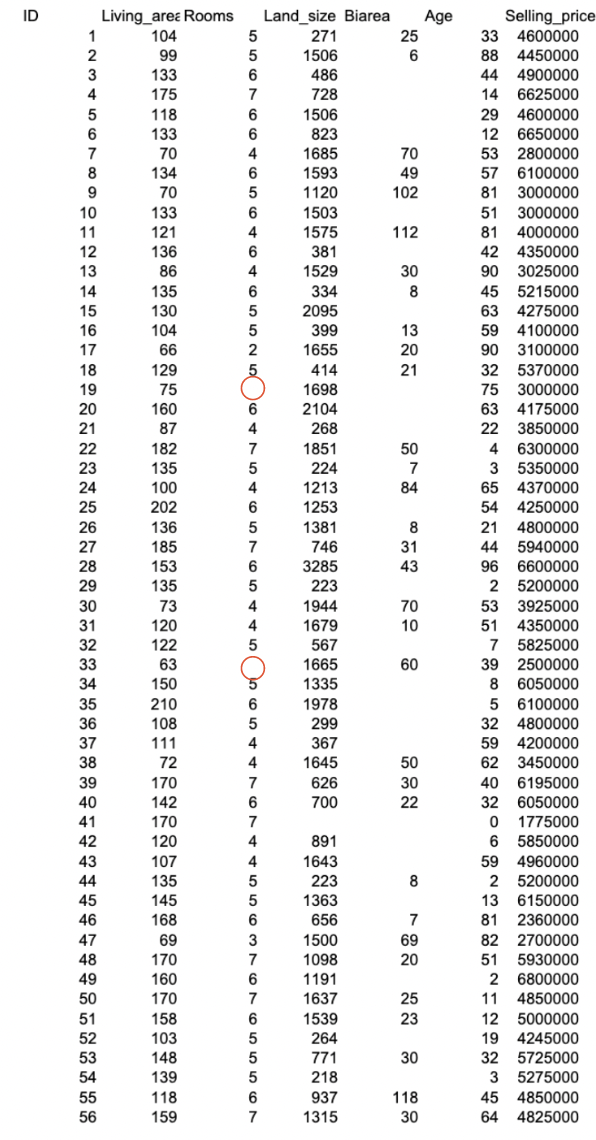

In [201]:
# Import CSV
HOUSESALE = pd.read_csv("/content/drive/MyDrive/test/data_assignment2.csv")

# Put the columns in keys
#LA_KEY = 'Living_area'
#SP_KEY = 'Selling_Price'


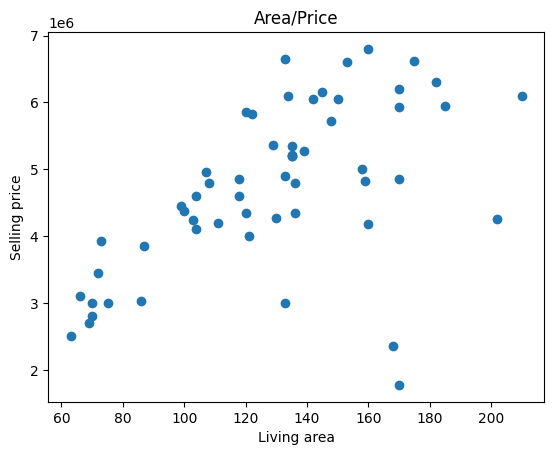

In [202]:
# Scatter living area to the selling price
# -----------------------------------------
# Adding some labels and a title to the graph
plt.xlabel('Living area')
plt.ylabel('Selling price')
plt.title('Area/Price')



# Now, time to scatter to test how it looks like
plt.scatter(HOUSESALE['Living_area'], HOUSESALE['Selling_price'])


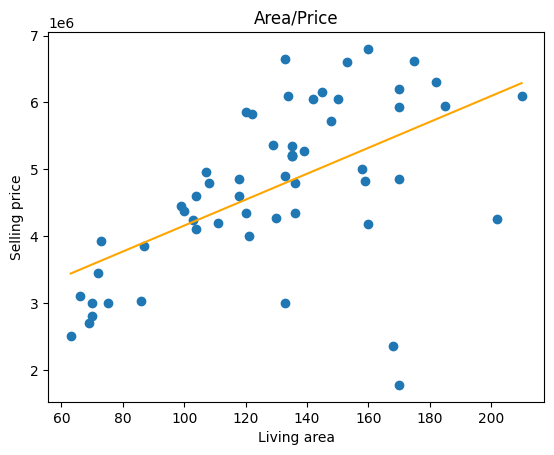

In [203]:
# Adding Linear regression

# Importing a library for Linear regression
from sklearn.linear_model import LinearRegression

# Putting our columns into lists (X and Y)
X = HOUSESALE['Living_area'].values
Y = HOUSESALE['Selling_price'].values



# Find the regression line 𝑓(𝑥) = 𝑘*𝑥 + 𝑚
linear_regressor = LinearRegression()
model_trained = linear_regressor.fit(X[:, np.newaxis], Y)
Y_pred = model_trained.predict(X[:, np.newaxis])


# Find min and max Living area to use as axis
LA_MAX = max(X)
LA_MIN = min(X)
# We know that the maximum area is 210, so use that as max
xfit = np.array([LA_MIN, LA_MAX])
yfit = linear_regressor.predict(xfit[:, np.newaxis])




# Adding some labels and a title to the graph
plt.xlabel('Living area')
plt.ylabel('Selling price')
plt.title('Area/Price')

# Scatter
plt.scatter(X, Y)

# Plot line
plt.plot(xfit, yfit, color='orange')
plt.savefig(f'1.png')
plt.show()



**Conclusion**

We have the data scattered and a linear regression line.
We did not clean the data as we did not use potential wrong data.
We do note that some houses are far of from the regression line, but we can not say that these houses have the wrong data. E.g. the house sold for 2 360 000 SEK and 168 m2 could potentially be in a very bad shape, or next to the airport.
The x-axis range from roughly 60 to 210 based on min and max values for Living Area.

**Task b**

What are the values of the slope and intercept of the regression line?




**Solution**

So we are looking for "k" (slope of the line) and "m" (where the line intercepts with the vertical axis) in 𝑓(𝑥) = 𝑘*𝑥 + 𝑚.

This can be calculate, or we can use .coef_ for slope and .intercept_ for intercept.

.coef_ will return an array with only one number, so we will transform it into an integer.

.intercept_ will have many decimals, but we will remove these.






In [204]:
from sklearn.linear_model import LinearRegression

print(int(model_trained.coef_), 'is "k" (slope).')
print(math.trunc(model_trained.intercept_), 'SEK is "m" (interception).')

19370 is "k" (slope).
2220603 SEK is "m" (interception).


**Task C**

Use this model to predict the selling prices of houses which have living area
10 m2, 100 m2, 150 m2, 200 m2, 1000 m2 .

**Solution**




In [205]:
# Use standard linear algebra 𝑓(𝑥) = 𝑘*𝑥 + 𝑚.

HOUSE10M2 = 19370*10 + 2220603
HOUSE100M2 = 19370*100 + 2220603
HOUSE150M2 = 19370*150 + 2220603
HOUSE200M2 = 19370*200 + 2220603
HOUSE1000M2 = 19370*1000 + 2220603



print("10 m2 house:", HOUSE10M2, "SEK")
print("100 m2 house:", HOUSE100M2,"SEK" )
print("150 m2 house:", HOUSE150M2,"SEK")
print("200 m2 house:", HOUSE200M2,"SEK")
print("1000 m2 house:", HOUSE1000M2,"SEK")



10 m2 house: 2414303 SEK
100 m2 house: 4157603 SEK
150 m2 house: 5126103 SEK
200 m2 house: 6094603 SEK
1000 m2 house: 21590603 SEK


In [206]:
# ...or use prepared functions - .predict

# Create two lists with sizes and houses based on predicted value from sizes.
sizes = np.array([10,100,150,200,1000])
houses = (model_trained.predict(sizes[:,np.newaxis]))

for row in houses:
  print(row , "SEK")


2414304.628829184 SEK
4157617.0980890263 SEK
5126124.025455605 SEK
6094630.952822184 SEK
21590741.79068745 SEK


The second method uses decimals in the calculation, thus the values differ slightly from the linear algebra method.

**d**

Draw a residual plot.

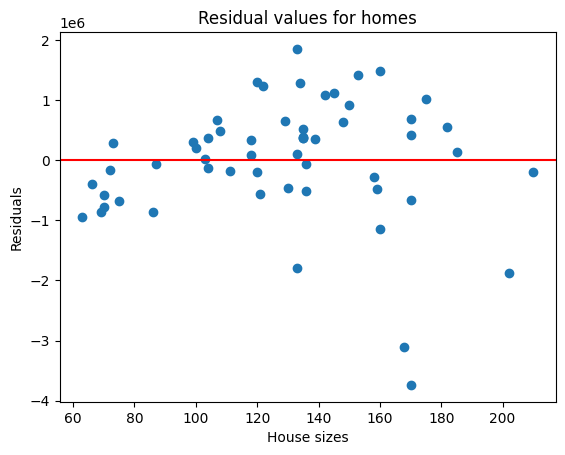

In [207]:
# We have our data in X and Y

# yfit = model.predict(xfit[:, np.newaxis])
# yRes = (Y - yfit)

# Calculate differenses (residual) between all Y's and Y_pred's
yRes = (Y - Y_pred)


# Create a residual plot
plt.scatter(X, yRes)
plt.axhline(y=0, color='red')
plt.xlabel('House sizes')
plt.ylabel('Residuals')
plt.title('Residual values for homes')
plt.show()


**e**

Is this a useful model? Are there any limitations? What could you do to
improve the models ability to predict selling prices? Can this model be used in
other areas than Landvetter?

**Answer e**

This is one model, but it is not enough to predict prices. As we can see, the prices are a bit scattered, and location (, location, location) is always important. In Landvetter we have the airport with a lot of international traffic, and the highway. Prices are often lower close to these. But we also have lakes and nice scenary that will make even small houses very expensive. So toi improve, we would like to suggest that the model(s) are complemented with location data, possible a rating from 1-5. We could also see that the house standards should be rated.
Yes, the model can be used in other areas, but with the additional data.

# **2.**

In this question, you will use the Iris data set (“from sklearn.datasets import
load_iris”).


In [208]:
# OK, import Iris DB
from sklearn.datasets import load_iris

**a**

Visualise the data. Can you gain any insights from the visualisation?


**2a - approach**

We start by investigation the data. How much data is it? Headlines? Types?
Once this is done, we try to figure ut some nive way to visualise the flowers. For this we will probably need some more graphs.


In [209]:

# Put iris-data in array
FLOWERS = load_iris()


# Checking the data: FLOWERS features and target names
print(FLOWERS.target_names)
print(FLOWERS.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


So we have 3 types of iris( setosa etc.) and for features (dimensions) for the leafs. They are in cm.
Let's look at the full dataset...

In [ ]:
print(FLOWERS)

(listing is hidden but looks like this

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],...
)   ...}   


A listing of the data shows us that we have 150 instances, 50 in each of 3 (iris)-types classes, together with the 4 features (leaf dimensions).

Let's visualize....

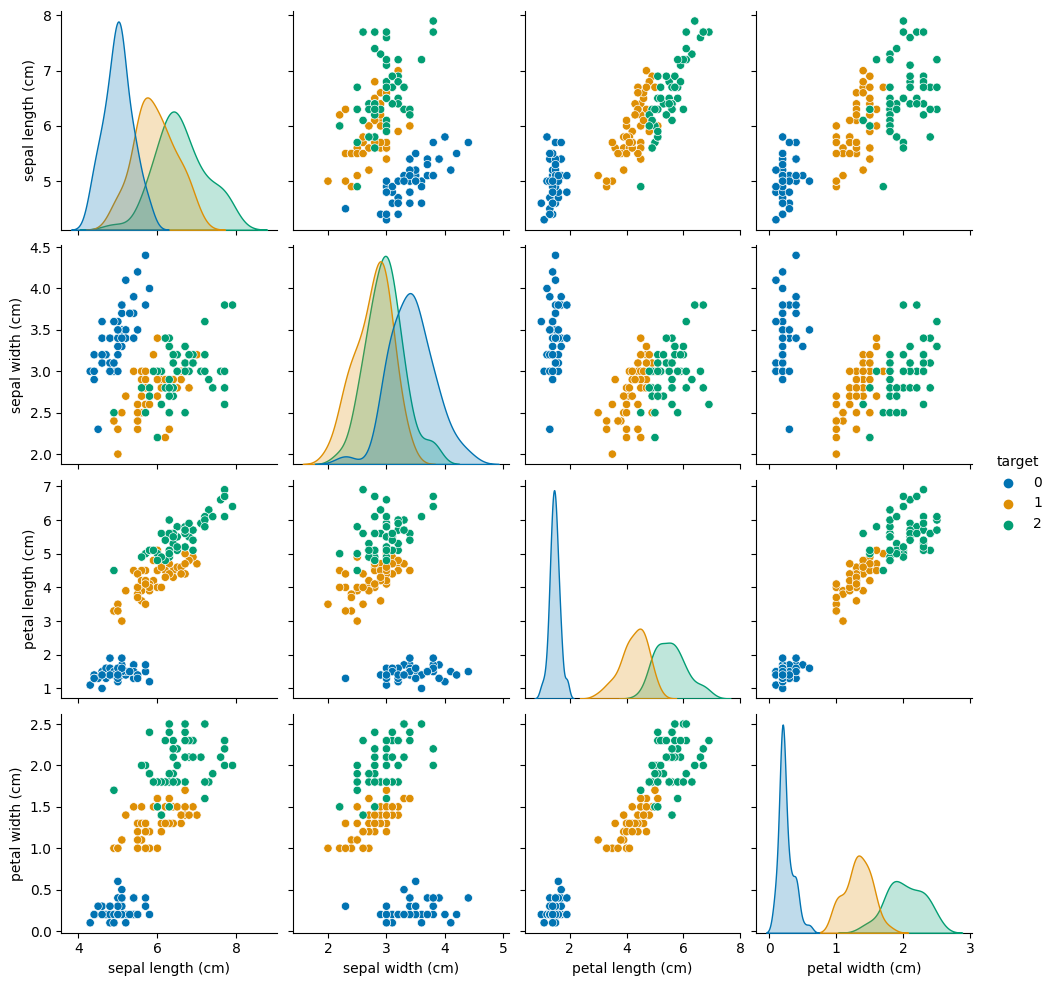

In [216]:
from pandas.core.indexes.multi import names_compat
# We need a few more librarys to visualise.
# Matlabplotlib helps us create graphps and plots.
import matplotlib.pyplot as plt

# Seaborn helps us making it look even better.
import seaborn as sns


# Load the iris dataset
#iris = load_iris()


# Now a Dataframe
FLOWERS_df = pd.DataFrame(data=FLOWERS.data, columns=FLOWERS.feature_names)

# Target variable for the graphs
FLOWERS_df['target'] = FLOWERS.target


# Visualize the pairwise relationships between features
# Use some nice colors
colors = sns.color_palette("colorblind")  
# Color-choice created a lot of warnings, so let's get rid of these...
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(data=FLOWERS_df, hue='target', palette=colors)

Wow, a lot of nice graphs. What do we see...

**Generall visual impression** shows that Setosa (blue) differs from thje others. It keeps a bit from the others, rather grouped.


**Top left** graph looks even and nice. evenly distributed, andf a nice, smooth decline in sepel lenght.

**Second from left/top** (sepel width/sepellenght) is perhaps the most scattered graph. If this was the only one, we would have some problems.

**Bottom third from the left** (petal lenght/petal width) is perhaps the one that most clearly distinguish the flower types. 

**b** 

Use a confusion matrix to evaluate the use of logistic regression to classify the
iris data set.


Text(0.5, 1.0, 'Normalized Confusion matrix \n\nAccuracy Score: 0.9111111111111111')

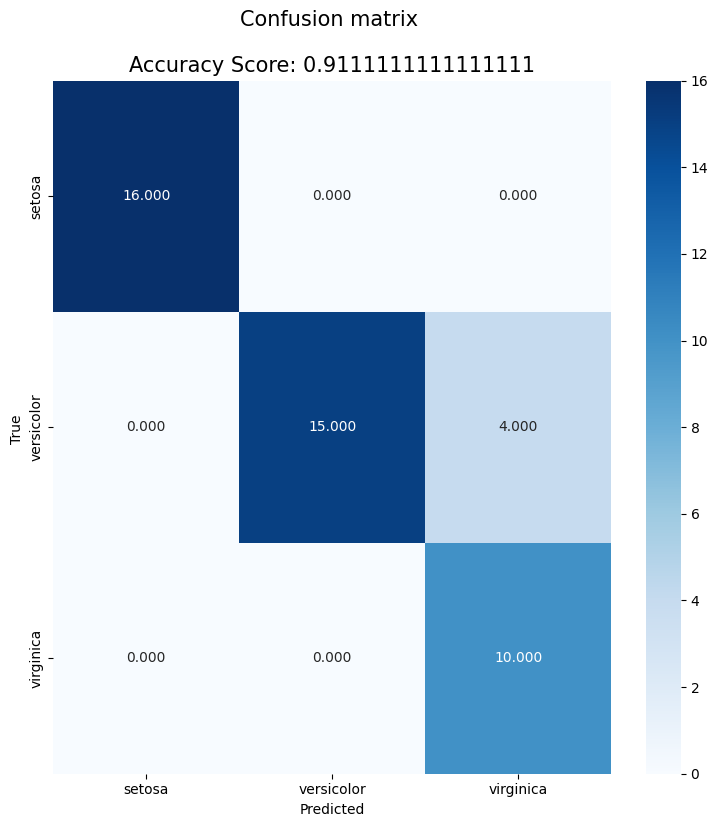

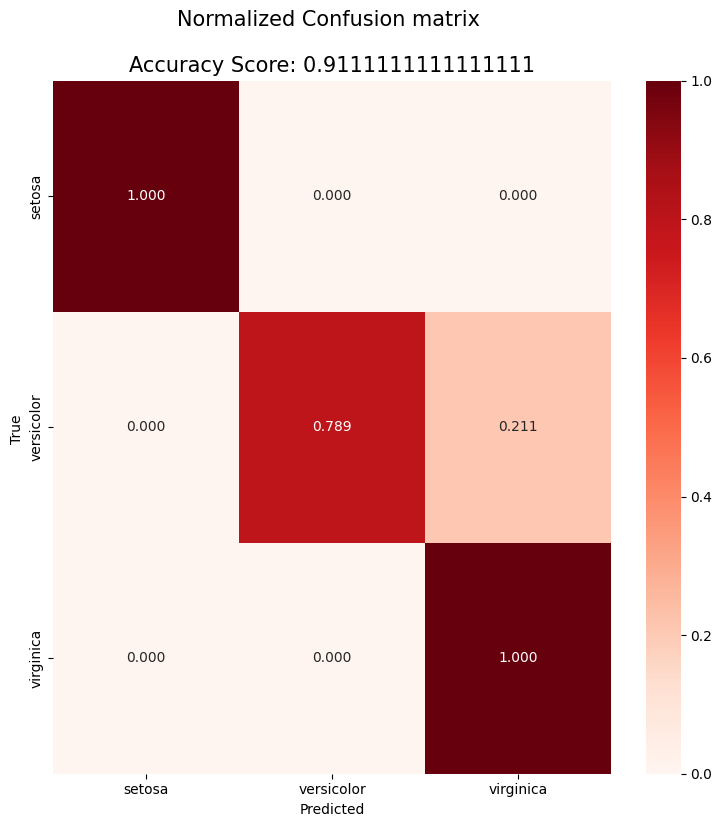

In [212]:
# Confusion matrix

#Import train_test_split function
from sklearn.model_selection import train_test_split

# Create training set (70%) and test set (30%)
X_train, X_test, Y_train, Y_test = train_test_split(FLOWERS.data, FLOWERS.target, test_size=0.3)


# Train the model using the training set
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train,Y_train)

# Using our model, we predict Y_pred based on the test data
Y_pred = model.predict(X_test)

# calculate model score (accuracy)
score = model.score(X_test, Y_test)
all_sample_title_NORM = 'Normalized Confusion matrix \n\nAccuracy Score: {0}'.format(score)
all_sample_title = 'Confusion matrix \n\nAccuracy Score: {0}'.format(score)



# Import lib
from sklearn.metrics import confusion_matrix
import seaborn as sns                         # Import heatmap-lib


# Create a confusion matrix
CONFMATRIX = confusion_matrix(Y_test, Y_pred)

# Create a normalized confusion matrix
CONFMATRIX_NORM = confusion_matrix(Y_test, Y_pred, normalize='true')

# Set labels. Same on both axis
LABELS = FLOWERS.target_names


# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(CONFMATRIX, xticklabels=LABELS,annot=True, fmt='.3f', cmap='Blues', yticklabels=LABELS)


ax.set_xlabel('Predicted')
ax.set_ylabel('True ')
ax.set_title(all_sample_title, size = 15)


# ----NORMALIZED VERSION


# Plot the normalized confusion matrix
fig, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(CONFMATRIX_NORM, xticklabels=LABELS, annot=True, fmt='.3f', cmap='Reds', yticklabels=LABELS)


ax.set_xlabel('Predicted')
ax.set_ylabel('True ')
ax.set_title(all_sample_title_NORM, size = 15)



**c**

Use k-nearest neighbours to classify the iris data set with some different
values for k, and with uniform and distance-based weights. What will happen
when k grows larger for the different cases? Why does this happen? What do
you think is the best choice of k? Compute a confusion matrix for the best
uniform and distance-based classifiers.



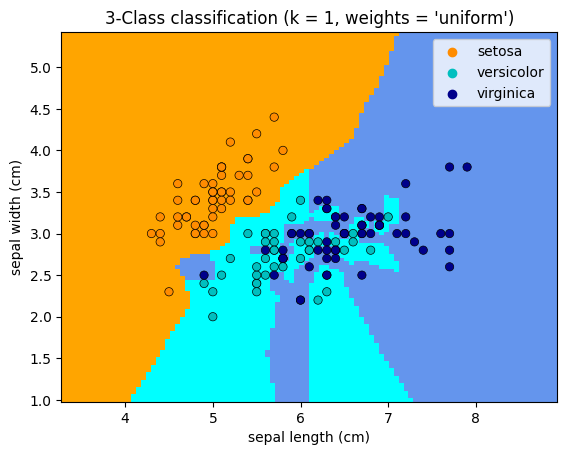

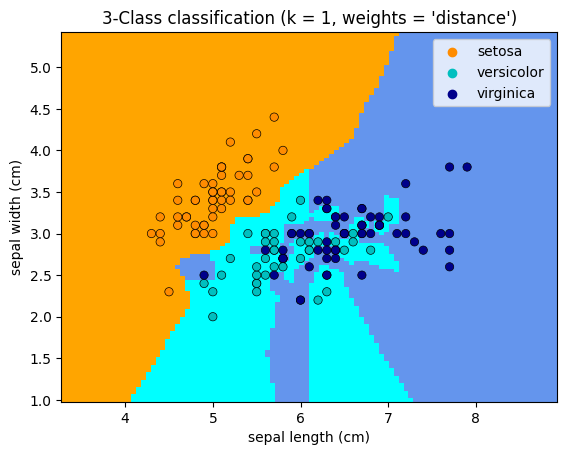

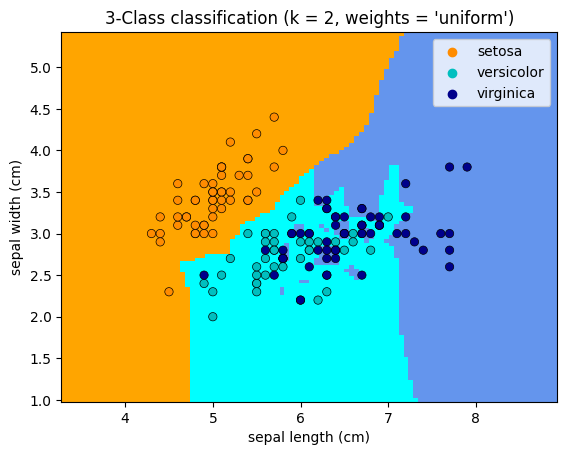

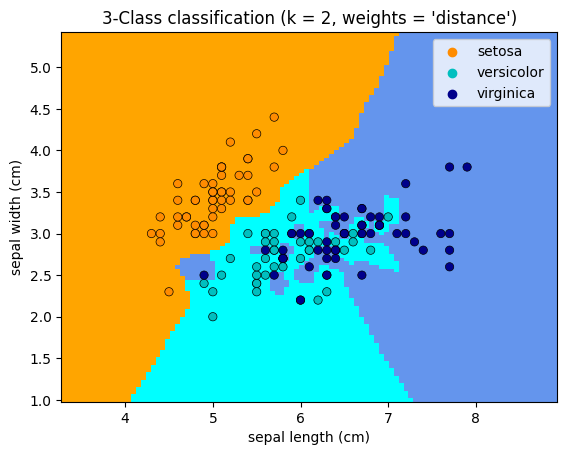

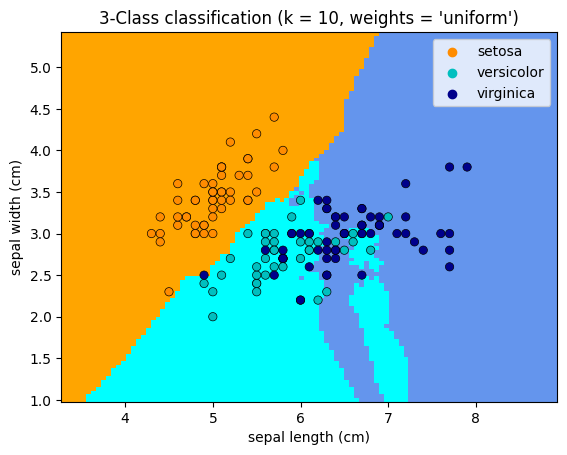

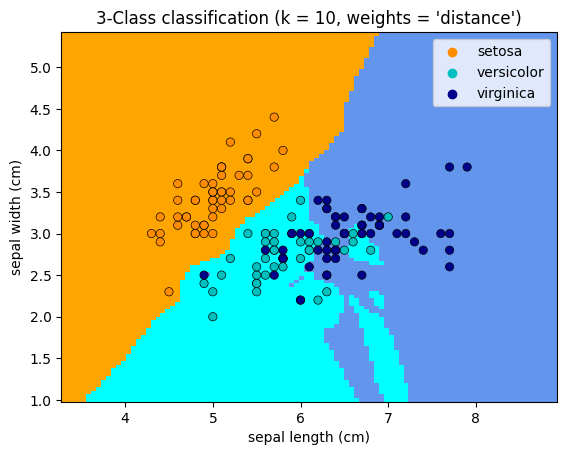

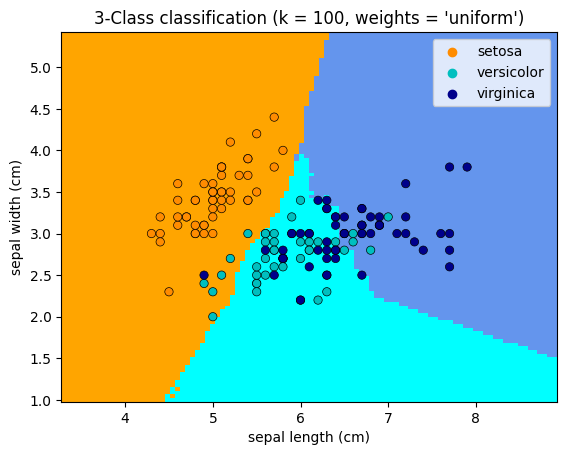

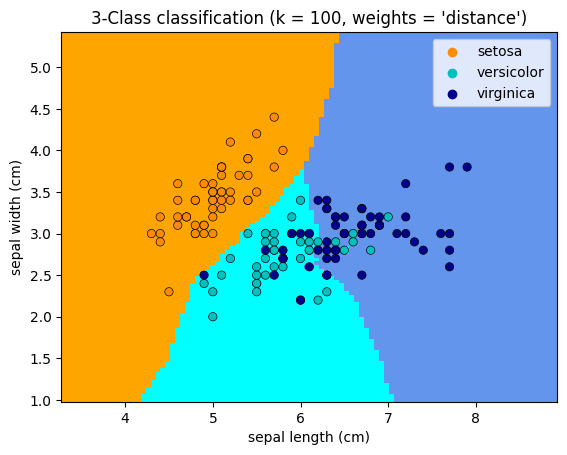

In [213]:
# Import
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay



# Our data is FLOWERS


# We use two features (sepal)
X_NEIGH = FLOWERS.data[:, :2]
y_NEIGH = FLOWERS.target

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]


# Set k
# k = 2
K = [1,2,10,100]


for k in K:
  for weights in ["uniform", "distance"]:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = neighbors.KNeighborsClassifier(k, weights=weights)
      clf.fit(X_NEIGH, y_NEIGH)

      _, ax = plt.subplots()
      DecisionBoundaryDisplay.from_estimator(
          clf,
          X_NEIGH,
          cmap=cmap_light,
          ax=ax,
          response_method="predict",
          plot_method="pcolormesh",
          xlabel=FLOWERS.feature_names[0],
          ylabel=FLOWERS.feature_names[1],
          shading="auto",
      )

      # Plot also the training points
      sns.scatterplot(
          x=X_NEIGH[:, 0],
          y=X_NEIGH[:, 1],
          hue=FLOWERS.target_names[y_NEIGH],
          palette=cmap_bold,
          alpha=1.0,
          edgecolor="black",
      )
      plt.title(
          "3-Class classification (k = %i, weights = '%s')" % (k, weights)
      )



**Changing k**

When k = 1, we get no missclassification, but the classification intertangled with each other. 

By increasing k, we get an increase in classification accuracy.
But as k increases more, it will be increasely hard to distinguish between versicolor and virginica. We get missclassifications and underfitting.

**Changing weight-method**

For k = 1, there is no real difference between uniform- and distance-based models. 
When increasing k = 100, we get a real value from using distance since the classification accuracy clearly is better.




**Subtask C**

Compute a confusion matrix for the best uniform and distance-based classifiers.

**Method**

We pick a small k-number (3) and a big one (99).

[Text(0, 0.5, 'setosa'), Text(0, 1.5, 'versicolor'), Text(0, 2.5, 'virginica')]

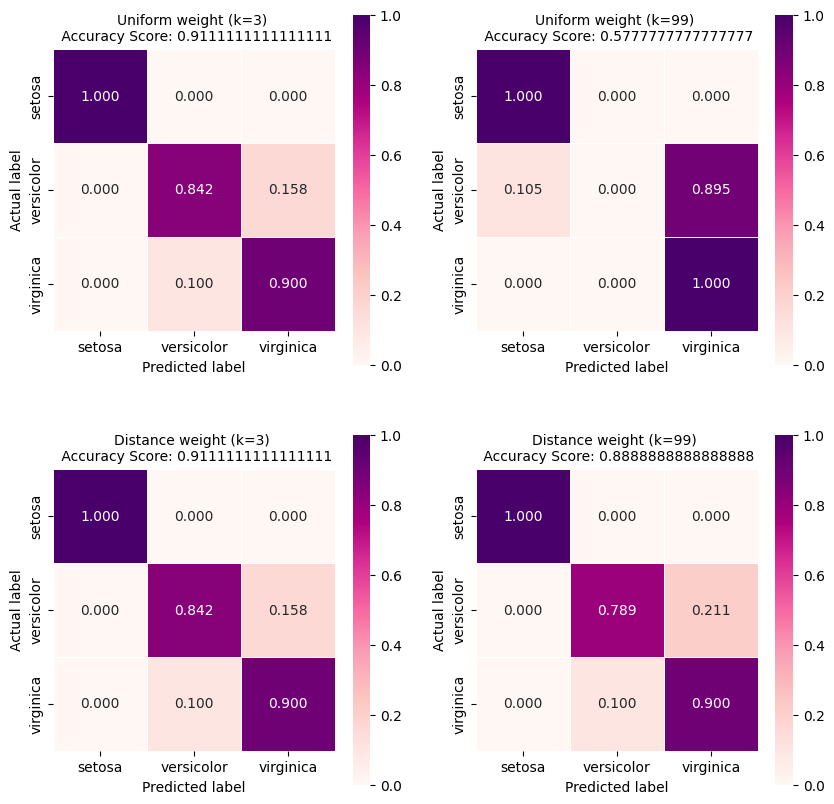

In [214]:
# import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
uniform3 = KNeighborsClassifier(n_neighbors=3,weights='uniform')
uniform99 = KNeighborsClassifier(n_neighbors=99,weights='uniform')
distance3 = KNeighborsClassifier(n_neighbors=3,weights='distance')
distance99 = KNeighborsClassifier(n_neighbors=99,weights='distance')

# Train the models using the training sets
for classifier in [uniform3, uniform99, distance3, distance99]:
  classifier.fit(X_train, Y_train)

# predict the response for test datasets
uniform3_predict = uniform3.predict(X_test)
uniform99_predict = uniform99.predict(X_test)
distance3_predict = distance3.predict(X_test)
distance99_predict = distance99.predict(X_test)

# model accuracy, how often is the classifier correct?
uniform3_score = uniform3.score(X_test,Y_test)
uniform99_score = uniform99.score(X_test,Y_test)
distance3_score = distance3.score(X_test,Y_test)
distance99_score = distance99.score(X_test,Y_test)

# create confusion matrixes
uniform3_cm = confusion_matrix(Y_test, uniform3_predict, normalize = 'true')
uniform99_cm = confusion_matrix(Y_test, uniform99_predict, normalize = 'true')
distance3_cm = confusion_matrix(Y_test, distance3_predict, normalize = 'true')
distance99_cm = confusion_matrix(Y_test, distance99_predict, normalize = 'true')

# plot confusion matrixes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
sns.heatmap(uniform3_cm, ax = ax1, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )
sns.heatmap(uniform99_cm, ax = ax2, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )
sns.heatmap(distance3_cm, ax = ax3, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )
sns.heatmap(distance99_cm, ax = ax4, annot = True, fmt=".3f", linewidths=.5, square=True, cmap='RdPu' )

# set labels
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('Actual label')
ax1.set_title('Uniform weight (k=3) \n Accuracy Score: {0}'.format(uniform3_score), size=10)
ax1.set_xticklabels(FLOWERS.target_names)
ax1.set_yticklabels(FLOWERS.target_names)
ax2.set_xlabel('Predicted label')
ax2.set_ylabel('Actual label')
ax2.set_title('Uniform weight (k=99) \n Accuracy Score: {0}'.format(uniform99_score), size=10)
ax2.set_xticklabels(FLOWERS.target_names)
ax2.set_yticklabels(FLOWERS.target_names)
ax3.set_xlabel('Predicted label')
ax3.set_ylabel('Actual label')
ax3.set_title('Distance weight (k=3) \n Accuracy Score: {0}'.format(distance3_score), size=10)
ax3.set_xticklabels(FLOWERS.target_names)
ax3.set_yticklabels(FLOWERS.target_names)
ax4.set_xlabel('Predicted label')
ax4.set_ylabel('Actual label')
ax4.set_title('Distance weight (k=99) \n Accuracy Score: {0}'.format(distance99_score), size=10)
ax4.set_xticklabels(FLOWERS.target_names)
ax4.set_yticklabels(FLOWERS.target_names)
# plt.show()

**Conclusion subtask C**

The distance matrix for k=3 and k=99 are the same, but for uniform we see some differencies, especially concerning versicolor. We see that this iris-type is prediced wrongly, especially when compared to veginica (but also setosa). 



**d**

Compare the logistic regression classifier in (a) with the k-nearest neighbour
classifiers in (b). What do you observe? Are all classes equally challenging for
the models to predict?

**Answer 2d**

We get a little bit confused by the referral to (a) and "logistic regression classifier". This was per instruction used in (b). Following upon this, "k-nearest neighbour classifiers" was used in (c).

This is why we oultined this before starting with our observation below.







**Observations**


For b) we used logistic regression classifier.

For c) we used knn-classsifier.

The data we are dealing with is somewhat spread out. If it was more binary, the logistic regression classifier would have been a faster and quit accurate way to classify the data. Even if we had larger data sets.
knn can handle less binary data-sets with no known function that describes the classes as it is a non-parametric model.

We have roughly the same amount of flowers in our data, so both models can predict, but if we had fewer flowers in one class, the knn might perform better.

The valuse of the accuracy score for logistic regression (0.96) are close to the one for k closest neighbor(0.96), except for high k-value/uniform weight (0.69).

So, to conclude, k closest neighbor seems to be less challenging.



